# <center> **Titanic Competition** </center>

**Link Competitions:** [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic)

**Made by:** *Vũ Khánh Nam*

***
## Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import PyQt5
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, log_loss

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear

In [2]:
df_train = pd.read_csv('./Data/train.csv')
df_test = pd.read_csv('./Data/test.csv')
PassengerID_test = df_test["PassengerId"]

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Preprocessing

In [3]:
df_train = df_train.drop(columns= ["Name", "Ticket", "PassengerId", "Cabin"])
df_test = df_test.drop(columns= ["Name", "Ticket", "PassengerId", "Cabin"])

df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### Fillna Train set

In [4]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [5]:
df_train = df_train.replace({"Sex": {"male":1, "female":0} })
df_train["Age"].fillna(df_train["Age"].median(), inplace=True)

df_train["Embarked"].fillna(method= "ffill", inplace=True)
df_train = df_train.replace({"Embarked": {"C":0, "Q":1, "S":2}})

df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [6]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Fillna Test set

In [7]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [8]:
df_test["Age"].fillna(df_test["Age"].median(), inplace=True)
df_test["Fare"].fillna(df_test["Fare"].median(), inplace=True)

df_test = df_test.replace({"Sex": {"male":1, "female":0} })
df_test = df_test.replace({"Embarked": {"C":0, "Q":1, "S":2}})

df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,27.0,0,0,8.0500,2


## Correlation map

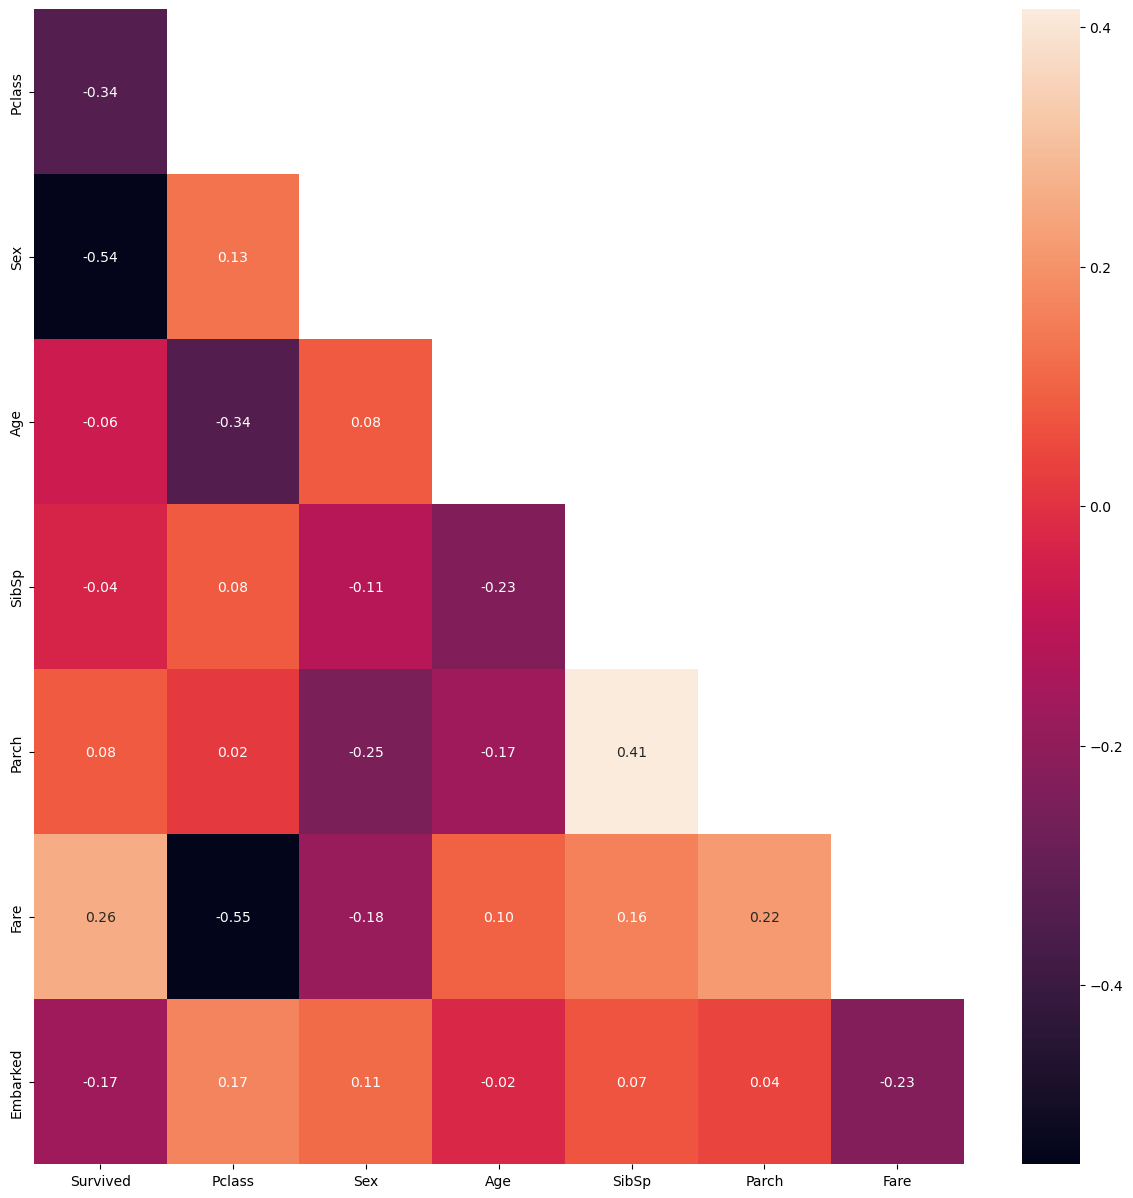

In [9]:
corr = df_train.corr()
one_corr = np.ones_like(corr, dtype=bool)

mask = np.triu(one_corr)
mask = mask[1:, :-1]
corr = corr.iloc[1:, :-1]

plt.figure(figsize=(15, 15))
sns.heatmap(data= corr, mask= mask, annot=True, fmt='.2f')
plt.show()

## Split Train_set, Val_set, Y_label

In [10]:
X = df_train.drop("Survived", axis= 1)
y = df_train["Survived"]

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size= 0.10, random_state= 0)

print("X_train:", X_train.shape, "  y_train:", y_train.shape, "\nX_val:", X_val.shape, "  \ny_val:", y_val.shape)


X_train: (801, 7)   y_train: (801,) 
X_val: (90, 7)   
y_val: (90,)


## Training and Choose the best module

### My NN

In [11]:
model_NN = Sequential(
    [
        layers.Flatten(input_shape = (X_train.shape[1],)),
        Dense(10, activation = "relu", name= "L1"),
        Dense(1, activation = "linear", name= "L2")
    ], name = "NN"
)
model_NN.summary()

Model: "NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 7)                 0         
                                                                 
 L1 (Dense)                  (None, 10)                80        
                                                                 
 L2 (Dense)                  (None, 1)                 11        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_NN.compile(
    loss= tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics=['accuracy']
)

Training set

In [13]:
history_train = model_NN.fit(X_train,y_train,
          epochs = 400,
          )

Epoch 1/400
26/26 [==============================] - 0s 985us/step - loss: 4.2300 - accuracy: 0.4944
Epoch 2/400
26/26 [==============================] - 0s 754us/step - loss: 0.6125 - accuracy: 0.5531
Epoch 3/400
26/26 [==============================] - 0s 802us/step - loss: 0.3741 - accuracy: 0.5943
Epoch 4/400
26/26 [==============================] - 0s 810us/step - loss: 0.2909 - accuracy: 0.6417
Epoch 5/400
26/26 [==============================] - 0s 889us/step - loss: 0.2575 - accuracy: 0.6891
Epoch 6/400
26/26 [==============================] - 0s 997us/step - loss: 0.2271 - accuracy: 0.7141
Epoch 7/400
26/26 [==============================] - 0s 914us/step - loss: 0.2214 - accuracy: 0.7104
Epoch 8/400
26/26 [==============================] - 0s 1ms/step - loss: 0.2147 - accuracy: 0.7303
Epoch 9/400
26/26 [==============================] - 0s 988us/step - loss: 0.2047 - accuracy: 0.7341
Epoch 10/400
26/26 [==============================] - 0s 748us/step - loss: 0.1824 - accuracy

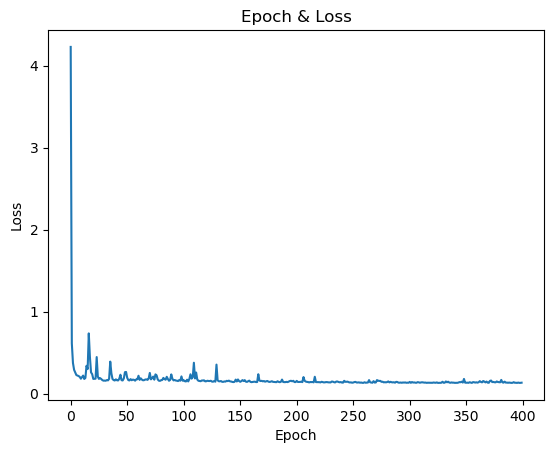

In [14]:
his_train_loss = history_train.history["loss"]
his_train_epoch = history_train.epoch

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Epoch & Loss")

plt.plot(his_train_epoch, his_train_loss)

Val set

In [15]:
y_pred_val = model_NN.predict(X_val)
y_pred_val = (y_pred_val > 0.5)

y_pred_train = model_NN.predict(X_train)
y_pred_train = (y_pred_train > 0.5)

accuracy_score_val = accuracy_score(y_val, y_pred_val)
accuracy_score_train = accuracy_score(y_train, y_pred_train)

print("loss_train:", history_train.history["loss"][-1])
print("accuracy_score_train:", accuracy_score_train)
print("accuracy_score_val:", accuracy_score_val)

26/26 [==============================] - 0s 725us/step
loss_train: 0.13364963233470917
accuracy_score_train: 0.8302122347066168
accuracy_score_val: 0.8333333333333334


In [16]:
mean_acc_NN = (accuracy_score_train+accuracy_score_val)/2 

### Naive Bayes

In [17]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train, y_train)
print("score on val: " + str(mnb.score(X_val, y_val)))
print("score on train: "+ str(mnb.score(X_train, y_train)))


score on val: 0.6666666666666666
score on train: 0.6891385767790262


In [18]:
mean_acc_NB = (mnb.score(X_val, y_val)+mnb.score(X_train, y_train))/2

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("score on val: " + str(lr.score(X_val, y_val)))
print("score on train: "+ str(lr.score(X_train, y_train)))

score on val: 0.8111111111111111
score on train: 0.7965043695380774


In [20]:
mean_acc_Logis = (lr.score(X_val, y_val)+lr.score(X_train, y_train))/2 

### K-Nearest Neighbours

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(X_train, y_train)

print("score on val: " + str(knn.score(X_val, y_val)))
print("score on train: "+ str(knn.score(X_train, y_train)))

score on val: 0.7111111111111111
score on train: 0.8164794007490637


In [22]:
mean_acc_KNN = (knn.score(X_train, y_train)+knn.score(X_val, y_val))/2 

### Support Vector Machine

In [23]:
from sklearn.svm import LinearSVC
svm=LinearSVC(C=0.2)
svm.fit(X_train, y_train)
print("score on val: " + str(svm.score(X_val, y_val)))
print("score on train: "+ str(svm.score(X_train, y_train)))

score on val: 0.7666666666666667
score on train: 0.8014981273408239


c:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [24]:
mean_acc_SuportVM = (svm.score(X_val, y_val)+svm.score(X_train, y_train))/2 

### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("score on val: "  + str(clf.score(X_val, y_val)))
print("score on train: " + str(clf.score(X_train, y_train)))


score on val: 0.7666666666666667
score on train: 0.9775280898876404


In [26]:
mean_acc_DeTree = (clf.score(X_val, y_val)+clf.score(X_val, y_val))/2 

### Bagging Decision Tree 

In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
 
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(X_train, y_train)
print("score on val: " + str(bg.score(X_val, y_val)))
print("score on train: "+ str(bg.score(X_train, y_train)))

score on val: 0.8111111111111111
score on train: 0.9288389513108615


In [28]:
mean_acc_BagDTree = (bg.score(X_val, y_val)+bg.score(X_train, y_train))/2 

### Boosting Decision Tree

In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb.fit(X_train, y_train)
print("score on val: " + str(adb.score(X_val, y_val)))
print("score on train: "+ str(adb.score(X_train, y_train)))

score on val: 0.8444444444444444
score on train: 0.9026217228464419


In [30]:
mean_acc_BoostDTree = (adb.score(X_val, y_val)+adb.score(X_train, y_train))/2 

### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(X_train, y_train)
print("score on val: " + str(rf.score(X_val, y_val)))
print("score on train: "+ str(rf.score(X_train, y_train)))

score on val: 0.8222222222222222
score on train: 0.9250936329588015


In [32]:
mean_acc_RandForest = (rf.score(X_val, y_val)+rf.score(X_train, y_train))/2 

### Voting Classifier

In [33]:
from sklearn.ensemble import VotingClassifier
# 1) naive bias = mnb
# 2) logistic regression =lr
# 3) random forest =rf
# 4) support vector machine = svm
evc=VotingClassifier(estimators=[('mnb',mnb),('lr',lr),('rf',rf),('svm',svm)],voting='hard')
evc.fit(X_train, y_train)
print("score on val: " + str(evc.score(X_val, y_val)))
print("score on train: "+ str(evc.score(X_train, y_train)))
print("mean:",  (evc.score(X_val, y_val)+evc.score(X_train, y_train))/2)

score on val: 0.8
score on train: 0.8489388264669163
mean: 0.8244694132334582


c:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [34]:
mean_acc_Voting = (evc.score(X_val, y_val)+evc.score(X_train, y_train))/2 

### XGBoost

In [56]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
 
xgb.fit(X_train,y_train)
 
xgb_pred_train = xgb.predict(X_train)
xgb_pred_val = xgb.predict(X_val)

xgb_acc_train = accuracy_score(y_train,xgb_pred_train)
xgb_acc_val = accuracy_score(y_val, xgb_pred_val)

print('accuracy train:', xgb_acc_train)
print('accuracy val:', xgb_acc_val)

accuracy train: 0.9600499375780275
accuracy val: 0.8333333333333334


In [57]:
mean_acc_xgb = (xgb_acc_train + xgb_acc_val) /2 

### Choose the best module

In [58]:
mean_module = [model_NN, mnb, lr, knn, svm, clf, bg, adb, rf, evc, xgb]

mean_name = ["My module NN", "Naive Bayes", "Logistic Regression", "K-Nearest Neighbours", "Support Vector Machine",
              "Decision Tree", "Bagging Decision Tree", "Boosting Decision Tree", "Random Forest", "Voting Classifier",
              "XGBoost"]

mean_acc = [mean_acc_NN, mean_acc_NB, mean_acc_Logis, mean_acc_KNN, mean_acc_SuportVM, mean_acc_DeTree, mean_acc_BagDTree,
            mean_acc_BoostDTree, mean_acc_RandForest, mean_acc_Voting, mean_acc_xgb]

mean_df = pd.DataFrame({"Module":mean_name,
                        "Mean Accuracy": mean_acc
                        })

mean_df = mean_df.sort_values('Mean Accuracy', ascending= False)
mean_df


,Module,Mean Accuracy
10,XGBoost,0.896692
8,Random Forest,0.873658
7,Boosting Decision Tree,0.873533
6,Bagging Decision Tree,0.869975
0,My module NN,0.831773
9,Voting Classifier,0.824469
2,Logistic Regression,0.803808
4,Support Vector Machine,0.784082
5,Decision Tree,0.766667
3,K-Nearest Neighbours,0.763795


## Predict

In [45]:
index = mean_df.index[0]
best_module = mean_module[index]
print("Best module:", mean_name[index])

y_pred_test = best_module.predict(df_test)

output = pd.DataFrame({'PassengerId': PassengerID_test, 'Survived': y_pred_test})
output.to_csv('submission.csv', index=False)
output

Best module: XGBoost


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
